# Install required liberaries

In [33]:
#Update pip (Skip if ERROR)
import sys

In [34]:
# Pandas
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd

In [36]:
#VaderSentiment

%pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [38]:
%pip install jupyterlab

Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install notebook

Note: you may need to restart the kernel to use updated packages.


In [40]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [41]:
from wordcloud import WordCloud

# Load Dataset

In [42]:
data = pd.read_csv('kens_comments.csv')
print("Running successful")

Running successful


In [43]:
data.shape

(5828, 12)

# Understand Dataset

In [44]:
#Checking for missing values and counting them
if data.isnull().values.any():
    print("The dataset has ", data.isnull().sum().sum(), " missing value(s)")
    print("Here is the number of missing values for each column:\n", data.isnull().sum())
else:
    print("The dataset has no missing values")

The dataset has no missing values


In [45]:
#Checking for douplicate values in the combined dataset and counting them
if data.duplicated().values.any():
    print("The dataset has ", combined_data.duplicated().sum(), " duplicate rows")
else:
    print("The dataset has no duplicate rows")

The dataset has no duplicate rows


In [46]:
#Column names + data types
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 2)
print(data.dtypes)

Unnamed: 0             int64
comment               object
comment_id            object
author_url            object
author_name           object
reply_count            int64
like_count             int64
date                  object
vidid                 object
total_reply_counts     int64
vid_title             object
just_date             object
dtype: object


In [47]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 42)
print(data.head)

<bound method NDFrame.head of       Unnamed: 0  \
0              0   
1              1   
...          ...   
5826        5826   
5827        5827   

                                                                                                                                                                                                                                                                                                                                                                                                      comment  \
0                                                                                                                                                                                                                                                                                                                                            Kaggle - recommended website for datasets, learning data science   
1     I have a hard dilemma, where I graduated 

In [48]:
#Read single row
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 2)
print(data.iloc[5]) # Change number for another row

Unnamed: 0                                                                              5
comment               Any good data sets for a time series project? Or anomaly detection?
comment_id                                                     Ugxd5C8WoLDCyGiHFF54AaABAg
author_url                        http://www.youtube.com/channel/UCh5WvQaSQk2Wi7QzyfENBrw
author_name                                                               theonlyone522 -
reply_count                                                                             0
like_count                                                                              0
date                                                            2020-11-25 19:34:51+00:00
vidid                                                                         8igH8qZafpo
total_reply_counts                                                                      0
vid_title                           3 Proven Data Science Projects for Beginners (Kaggle)
just_date 

In [49]:
# Count number of comments per video (overview)

video_comment_counts = (
    data.groupby('vid_title')
        .size()
        .reset_index(name='num_comments')
        .sort_values(by='num_comments', ascending=False)
        .reset_index(drop=True)
)
pd.set_option('display.max_rows', 170)
pd.set_option('display.max_columns', 2)
print(video_comment_counts)

                                                                                         vid_title  \
0                                          How I Would Learn Data Science (If I Had to Start Over)   
1                                       The Best Free Data Science Courses Nobody is Talking About   
2                                                        Why I'm Starting Data Science Over Again.   
3                                            3 Proven Data Science Projects for Beginners (Kaggle)   
4                                           Data Science Certificate vs Bootcamp vs Masters Degree   
5                                  Building a Deep Learning BEAST (NVIDIA TITAN RTX + RYZEN 3900X)   
6                                     Data Science Project from Scratch - Part 2 (Data Collection)   
7                                         Scrape Twitter Data in Python with Twitterscraper Module   
8                                             5 Essential Data Science Projects fo

# Data preparation

In [50]:
# delete records with less than x comments per video
# Define threshold
 
x = 50
# Count comments per video
 
video_comment_counts = (
 
    data.groupby('vid_title')
 
        .size()
 
        .reset_index(name='num_comments')
 
)
# Keep only videos with at least x comments
 
valid_videos = video_comment_counts.loc[
 
    video_comment_counts['num_comments'] >= x, 'vid_title'
 
]
# Filter the original dataset
 
data2 = data[data['vid_title'].isin(valid_videos)].copy()
# Count number of comments per video (overview)
video_comment_counts2 = (
    data2.groupby('vid_title')
        .size()
        .reset_index(name='num_comments')
        .sort_values(by='num_comments', ascending=False)
        .reset_index(drop=True)
)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 2)
print(video_comment_counts2)
print("This is the new shape:")
data2.shape

                                                                                        vid_title  \
0                                         How I Would Learn Data Science (If I Had to Start Over)   
1                                      The Best Free Data Science Courses Nobody is Talking About   
2                                                       Why I'm Starting Data Science Over Again.   
3                                           3 Proven Data Science Projects for Beginners (Kaggle)   
4                                          Data Science Certificate vs Bootcamp vs Masters Degree   
5                                 Building a Deep Learning BEAST (NVIDIA TITAN RTX + RYZEN 3900X)   
6                                    Data Science Project from Scratch - Part 2 (Data Collection)   
7                                        Scrape Twitter Data in Python with Twitterscraper Module   
8                                            5 Essential Data Science Projects for Your Por

(3415, 12)

In [51]:
import subprocess
import importlib

def pip_install(package):
    print(f"Installing {package} into {sys.executable} ...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Ensure nltk and pandas are installed
for pkg in ["nltk", "pandas"]:
    try:
        importlib.import_module(pkg)
    except ImportError:
        pip_install(pkg)

import nltk
import pandas as pd

# Ensure VADER lexicon is available
try:
    nltk.data.find("sentiment/vader_lexicon.zip")
except LookupError:
    print("Downloading vader_lexicon...")
    nltk.download("vader_lexicon", quiet=True)

from nltk.sentiment.vader import SentimentIntensityAnalyzer

def filter_positive_from_csv(input_csv, output_csv, text_column="comment", threshold=0.05):
    sia = SentimentIntensityAnalyzer()

    # Load CSV
    df = pd.read_csv(input_csv)

    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found. Columns available: {list(df.columns)}")

    # Apply VADER sentiment
    df["compound"] = df[text_column].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

    # Filter positive comments
    df_positive = df[df["compound"] >= threshold]

    # Save results
    df_positive.to_csv(output_csv, index=False)
    print(f"Saved {len(df_positive)} positive comments to {output_csv}")

# --------- RUN HERE ---------

filter_positive_from_csv(
    input_csv="kens_comments.csv",
    output_csv="kens_positive_comments.csv",
    text_column="comment",   # <-- change this if your column name is different
    threshold=0.05
)

Saved 4527 positive comments to kens_positive_comments.csv


In [52]:
analyzer = SentimentIntensityAnalyzer()

In [53]:
def vader_scores(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)
    else:
        return {"neg": 0, "neu": 0, "pos": 0, "compound": 0}
 
scores = data2['comment'].apply(vader_scores).apply(pd.Series)
data3 = pd.concat([data2, scores], axis=1)

def label_sentiment(c):
    if c >= 0.05:
        return "positive"
    elif c <= -0.05:
        return "negative"
    else:
        return "neutral"
 
data3['sentiment'] = data3['compound'].apply(label_sentiment)

data3[['comment', 'neg', 'neu', 'pos', 'compound', 'sentiment']].head()

,comment,...,sentiment
0,"Kaggle - recommended website for datasets, learning data science",...,positive
2,Thank you for continuing to share and add to the community. I started Kaggle and you make a lot of good points about the benefits for the short and long run with it.,...,positive
3,Awesome tutorial. I have a question. Why do you log normalize Sibsp and Fare in addition to using StandardScaler? What does the log normalization accomplish that the StandardScaler doesn't?,...,positive
5,Any good data sets for a time series project? Or anomaly detection?,...,positive
7,"sir, could you please tell me about the background music being used .its so motivating and it gives me a pump for pushing myself forward.",...,positive


In [54]:
def vader_scores(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)
    else:
        return {"neg": 0, "neu": 0, "pos": 0, "compound": 0}
 
scores = data2['comment'].apply(vader_scores).apply(pd.Series)
data3 = pd.concat([data2, scores], axis=1)

In [55]:
def label_sentiment(c):
    if c >= 0.55:
        return "positive"
    elif c <= -0.001:
        return "negative"
    else:
        return "neutral"
 
data3['sentiment'] = data3['compound'].apply(label_sentiment)

In [56]:
data3[['comment', 'neg', 'neu', 'pos', 'compound', 'sentiment']].head()

sentiment_counts = data3['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    1849
neutral     1319
negative     247
Name: count, dtype: int64


In [57]:
# Sort data3 from highest to lowest compound score
data3_sorted = data3.sort_values(by="compound", ascending=False)
 
# Save to CSV
data3_sorted.to_csv("data3_sorted.csv", index=False)

In [58]:
# count how many negative and positive comments a video has + scoring of videos (%) 
# Which video was the best and which video has the most negative impact? 

video_sentiment_counts = (
    data3.groupby(["vid_title", "sentiment"])
         .size()
         .unstack(fill_value=0)
         .reset_index()
)

# ensure missing categories don't break the table
for col in ["positive", "negative", "neutral"]:
    if col not in video_sentiment_counts.columns:
        video_sentiment_counts[col] = 0

# calculates percentage
video_sentiment_counts["total_comments"] = (
    video_sentiment_counts["positive"] +
    video_sentiment_counts["negative"] +
    video_sentiment_counts["neutral"]
)

video_sentiment_counts["positive_%"] = (
    video_sentiment_counts["positive"] /
    video_sentiment_counts["total_comments"] * 100
)

video_sentiment_counts["negative_%"] = (
    video_sentiment_counts["negative"] /
    video_sentiment_counts["total_comments"] * 100
)

# find best and worst video
best_video = video_sentiment_counts.loc[
    video_sentiment_counts["positive_%"].idxmax(), "vid_title"
]

worst_video = video_sentiment_counts.loc[
    video_sentiment_counts["negative_%"].idxmax(), "vid_title"
]

# result
print("\n===== Results =====")
print(f"👍 Best video (highest % positive): {best_video}")
print(f"👎 Video with most negative impact: {worst_video}")


===== Results =====
👍 Best video (highest % positive): 10000 Subscriber and 100th Video Special (Data Science)
👎 Video with most negative impact: Scrape Twitter Data in Python with Twitterscraper Module


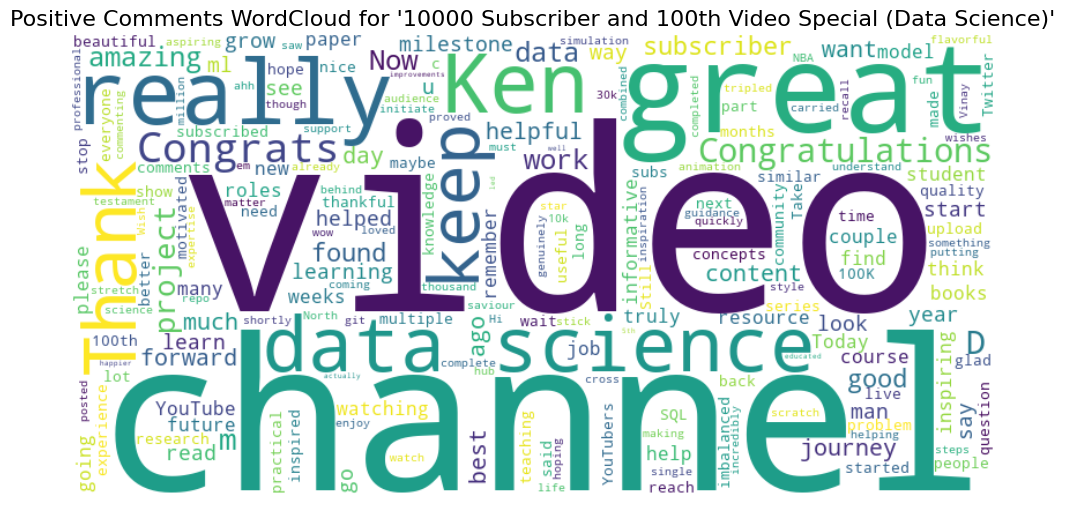

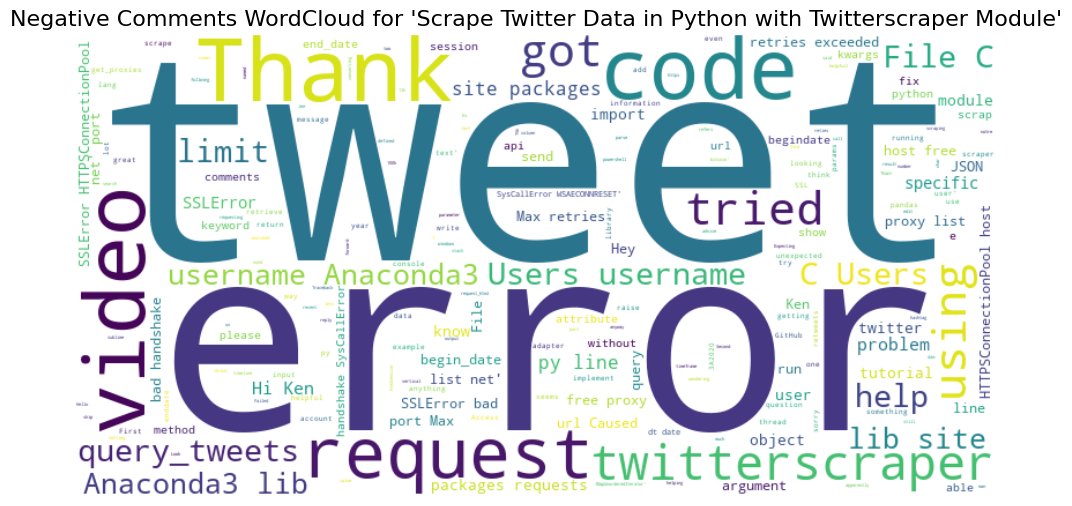

In [59]:
# wordcloud for one of the videos with the most positive comments
# What is the wordcloud of the "positive comments" for the video with the most positive comments? 

# wordcloud for one of the videos with the most negative comments
# What is the wordcloud of the "negative comments" for the video with the most negative comments? 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# wordcloud - positive comments
most_positive_video = best_video
positive_comments = data3[
    (data3['vid_title'] == most_positive_video) & 
    (data3['sentiment'] == 'positive')
]['comment'].dropna().str.cat(sep=' ')

generate_wordcloud(positive_comments, f"Positive Comments WordCloud for '{most_positive_video}'")

# wordcloud - negative comments 
most_negative_video = worst_video
negative_comments = data3[
    (data3['vid_title'] == most_negative_video) & 
    (data3['sentiment'] == 'negative')
]['comment'].dropna().str.cat(sep=' ')

generate_wordcloud(negative_comments, f"Negative Comments WordCloud for '{most_negative_video}'")

Possible date columns found: ['upload_date']
Using date column: upload_date
                                                                                        vid_title  \
18                                                        How YOU Can Land a Sports Analytics Job   
23                                                         Math Needed for Mastering Data Science   
8                                   Data Science Project from Scratch - Part 1 (Project Planning)   
15                  How I Learn Data Science Through Studying Other People's Code | #66DaysOfData   
32              The State of Data Science with Krish Naik & The Data Professor [Panel Discussion]   
26                                                              Sh*t Data Scientists Say (Parody)   
9                                    Data Science Project from Scratch - Part 2 (Data Collection)   
29                                                         The Plagiarism Problem in Data Science   
10             

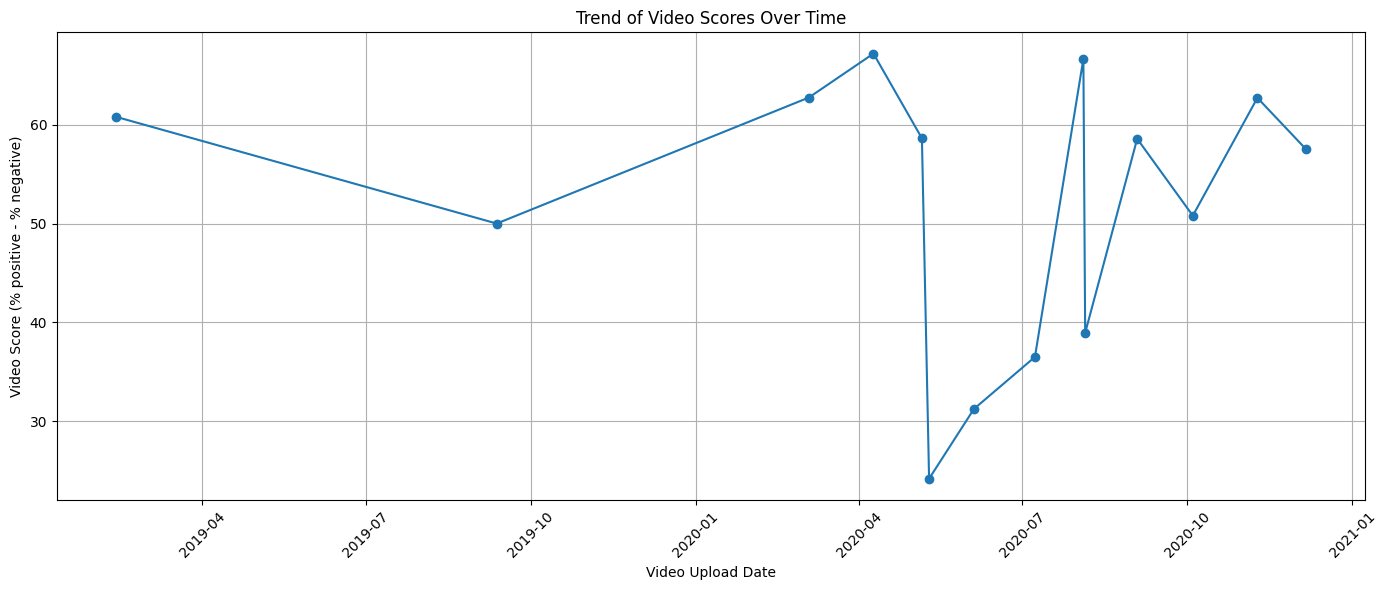

In [61]:
# trend of the videos - chronological order - based on sentiment score

import matplotlib.pyplot as plt
import pandas as pd

# loading new CSV 
data4 = pd.read_csv("ken_jee_videos.csv")

# automatic detection date column
possible_dates = [col for col in data4.columns if "date" in col.lower() or "time" in col.lower()]

print("Possible date columns found:", possible_dates)

# detect data column
possible_dates = [col for col in data4.columns if "date" in col.lower() or "time" in col.lower()]

if len(possible_dates) == 0:
    raise ValueError("No date column detected. Please check your CSV. Columns are: " + str(list(data4.columns)))

# first detected date column
date_column = possible_dates[0]
print("Using date column:", date_column)

# video date extraction
video_dates = (
    data4[["vid_title", date_column]]
    .drop_duplicates(subset="vid_title")
)

video_dates[date_column] = pd.to_datetime(video_dates[date_column], errors="coerce")

# merge table
video_sentiment_with_dates = video_sentiment_counts.merge(
    video_dates,
    on="vid_title",
    how="left"
)

# score compute
video_sentiment_with_dates["video_score"] = (
    video_sentiment_with_dates["positive_%"] - video_sentiment_with_dates["negative_%"]
)

# date sort 
video_trend = video_sentiment_with_dates.sort_values(by=date_column)

print(video_trend[["vid_title", date_column, "video_score"]])

# plot table
plt.figure(figsize=(14,6))
plt.plot(video_trend[date_column], video_trend["video_score"], marker='o')
plt.title("Trend of Video Scores Over Time")
plt.xlabel("Video Upload Date")
plt.ylabel("Video Score (% positive - % negative)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
print(data4.columns.tolist())

['vid_title', 'upload_date']


In [64]:
# Who is the most active subscriber? 
# counting the user's comments on the videos

user_column = "author_name"

# remove rows where user is not present
clean_data = data3[data3[user_column].notna()].copy()

# counting comments per user 
user_activity = clean_data[user_column].value_counts().reset_index()

# fixing column names
user_activity.columns = ["user", "num_comments"]

print("\n=== user_activity DataFrame ===")
print(user_activity.head())
print(user_activity.columns)

# extracting most active user 
most_active_user = user_activity.iloc[0]["user"]
most_active_count = user_activity.iloc[0]["num_comments"]

print("\n===== Most Active User =====")
print(f"👤 User: {most_active_user}")
print(f"💬 Total Comments: {most_active_count}")

# counting comments per video from identified user
user_comments_per_video = (
    clean_data[clean_data[user_column] == most_active_user]
    .groupby("vid_title")
    .size()
    .reset_index(name="comments_by_user")
    .sort_values("comments_by_user", ascending=False)
)

print("\n===== Comment Distribution for Most Active User =====")
print(user_comments_per_video)


=== user_activity DataFrame ===
              user  num_comments
0          Ken Jee            31
1   Data Professor            15
2       Boris Giba            14
3            Mario            13
4  Muhammad Hashir            12
Index(['user', 'num_comments'], dtype='object')

===== Most Active User =====
👤 User: Ken Jee
💬 Total Comments: 31

===== Comment Distribution for Most Active User =====
                                                                                        vid_title  \
21                                       Scrape Twitter Data in Python with Twitterscraper Module   
0                                         10000 Subscriber and 100th Video Special (Data Science)   
2                                            5 Essential Data Science Projects for Your Portfolio   
3                                     Beginner Kaggle Data Science Project Walk-Through (Titanic)   
4                                 Building a Deep Learning BEAST (NVIDIA TITAN RTX + RYZEN 390

# Source data set

In [ ]:
https://github.com/hellotinah/youtube_sentiment_analysis/blob/main/kens_comments.csv